In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import loadtxt, savetxt
from scipy.signal import find_peaks
from scipy import stats
from scipy.optimize import fsolve

In [7]:
def loadfiles(name):
    lines = loadtxt(name,delimiter="\t")
    ks = np.zeros((len(lines)))
    ints = np.zeros((len(lines)))
    for i in range(len(lines)):
        ks[i] = lines[i][0]
        ints[i] = lines[i][1]

    return ks,ints

#beta = 2*kap/k
#R1 = np.abs()
#R=R1*(1+(1-2*R1)*np.exp(-2*beta*d))/(1-R1**2*np.exp(-2*beta*d))
#T=((1-R1)**2*np.exp(-2*beta*d))/(1-R1**2*np.exp(-2*beta*d))

In [8]:
def calcn(file,d):
    start=2500
    end=7000
    steps = int((end-start)/500)+1
    ks = np.linspace(start,end,steps)
      
    wn,ints = loadfiles(file)

    peaks, _ = find_peaks(ints, height=0)

    avgns = np.array([])
    avgnserrors = np.array([])
    epsilons = np.array([])
    epsilonserrors = np.array([])
        
    for k in ks:        
        #print(k)
        closest = min(range(len(wn)), key=lambda i: abs(wn[i]-k)) #sucht den index für eine wavenumber
        #print(peaks)
        #print(wn[closest])
        #print(closest)

        fiftypeaks = np.array([],dtype=int)              


        pc = 1
        nc = 1
        numb = 0


        while len(fiftypeaks)<51:
            #print(len(fiftypeaks))

            if len(fiftypeaks)%2==0:
                numb = closest + pc
                #print(numb)

                if numb in peaks:
                    fiftypeaks = np.append(fiftypeaks,numb)

                pc+=1

            else:
                numb = closest - nc
                #print(numb)

                if numb in peaks:
                    fiftypeaks = np.append(fiftypeaks,numb)            

                nc+=1

        ptwn = np.zeros([51],dtype=float)   #peak to wave number
        for i in range(51):
            ptwn[i] = wn[fiftypeaks[i]]

        ptwn = np.sort(ptwn)
        

        ns = np.zeros([50]) 
        nssiggi = np.zeros([50]) 
        for i in range(50):
            dif = (ptwn[i+1]-ptwn[i])*10**2
            siggidiff = np.sqrt(2)*30
            ns[i] = 1/(2*d*dif)
            nssiggi[i] = (siggidiff/(2*d*dif**2))**2
            
        n=np.average(ns)
        #nerror=sp.stats.sem(ns)
        nerror = np.sqrt(np.sum(nssiggi))/50
        
        avgns = np.append(avgns,n)
        avgnserrors = np.append(avgnserrors,nerror)
        
        eps= n**2
        epserror = 2*n*nerror
        
        epsilons = np.append(epsilons,eps)
        epsilonserrors = np.append(epsilonserrors,epserror)
        
    for i in range(len(avgns)):
        print("n=",avgns[i],"+-",avgnserrors[i])
    for i in range(len(avgns)):
        print("eps=",epsilons[i],"+-",epsilonserrors[i])
        
        
        
        np.savetxt("n&epsilon_"+file+".txt", np.transpose([avgns,avgnserrors,epsilons,epsilonserrors]))
        #print("n=",n,"+-",nerror)
        #print("eps=",eps,"+-",epserror)
        #print(fiftypeaks)
        #plt.plot(wn,ints)
        #plt.plot(ptwn, ints[fiftypeaks], "x")
        #plt.xlim([5900, 6100])
        #plt.ylim([0.52, 0.6])
        #plt.show()
        
    
print("GaAs undoped")    
calcn("Aufgabe_3_S1-GaAs-undoped-470um_N50_R0.3_TR.txt",470*10**(-6))
print("GaAs n-doped")   
calcn("Aufgabe_3_S2-GaAs-n-doped-440um_N50_R0.3_TR.txt",470*10**(-6))
print("Si undoped")   
calcn("Aufgabe_3_S4-Si-undoped-530um_N50_R0.3_TR.txt",470*10**(-6))

GaAs undoped
n= 3.248177851274341 +- 0.05956991857175594
n= 3.2623658456420643 +- 0.06007967371273442
n= 3.2743987909887715 +- 0.0605204942028411
n= 3.2943339629558697 +- 0.06128130087918234
n= 3.3216324367456567 +- 0.06230219926512595
n= 3.4979456223622525 +- 0.08410928023848158
n= 3.381476855799576 +- 0.0647885647976893
n= 3.415320695003287 +- 0.06608754747797384
n= 3.4549901060846793 +- 0.06761188275737717
n= 3.4976528080254132 +- 0.06939825949085895
eps= 10.550659353509195 +- 0.3869873802139873
eps= 10.643030910811861 +- 0.39200375107548824
eps= 10.72168744242873 +- 0.3963364660956517
eps= 10.852636259484525 +- 0.4037621415608156
eps= 11.03324204484089 +- 0.41389001191926755
eps= 12.235623577003246 +- 0.5884193772204731
eps= 11.434385726308186 +- 0.43816206476771496
eps= 11.664415449717735 +- 0.45142033716707264
eps= 11.936956633143023 +- 0.4671967719609909
eps= 12.233575165488059 +- 0.48546203436055824
GaAs n-doped
n= 3.098633555746931 +- 0.054258031122098906
n= 3.0983436966848554

In [9]:
def getnandkappa(file1,file2,d,n,kap):
    k,T = loadfiles(file1)
    R = loadfiles(file2)[1]
    
    ns=np.array([])
    kappas=np.array([])
    betas=np.array([])
    for i in range(len(k)):
        
        def func(x):
            return [((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2)+(((1-((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2))**2)*((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2)*np.exp(-2*4*np.pi*np.absolute(x[1])*k[i]*100*d))/(1-((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2)*((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2)*np.exp(-2*4*np.pi*np.absolute(x[1])*k[i]*100*d))-R[i],
((1-((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2))*(1-((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2))*np.exp(-4*np.pi*np.absolute(x[1])*k[i]*100*d))/(1-((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2)*((x[0]-1)**2+x[1]**2)/((x[0]+1)**2+x[1]**2)*np.exp(-2*4*np.pi*np.absolute(x[1])*k[i]*100*d))-T[i]]
        roots = fsolve(func,[n,kap],maxfev=10000)
        ns=np.append(ns,roots[0])
        kappas=np.append(kappas,roots[1])
        betas=np.append(betas,4*np.pi*roots[1]*k[i])
        
    plt.plot(k,ns)
    plt.show()
    plt.plot(k,kappas)
    plt.show()
    plt.plot(k,betas)
    plt.show()
    np.savetxt("ns&kappas&betas"+file1+".txt", np.transpose([k,ns,kappas,betas]))

#getnandkappa("Aufgabe_4-1_S4-Si-undoped-530um_N50_R4_TR.txt","Aufgabe_4-2_S4-Si-undoped-530um_N50_R4_RE.txt",530*10**(-6),3.4,0.00005)
#getnandkappa("Aufgabe_4-1_S5-Si-n-doped-500um_N50_R4_TR.txt","Aufgabe_4-2_S5-Si-n-doped-500um_N50_R4_RE.txt",530*10**(-6),3.4,0.00005)
    
    
    
    #kappa = x[0]
    #n = x[1]
    #R1 = (1-(4*x[1])/((1+x[1])**2+x[0]**2))
    #beta = 2*x[0]/k
    #R=R1*(1+(1-2*R1)*np.exp(-2*beta*d))/(1-R1**2*np.exp(-2*beta*d))
    #T=((1-R1)**2*np.exp(-2*beta*d))/(1-R1**2*np.exp(-2*beta*d))

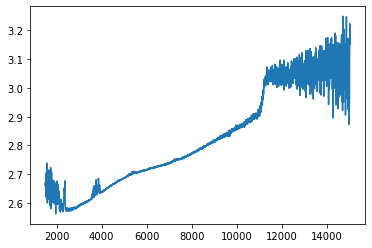

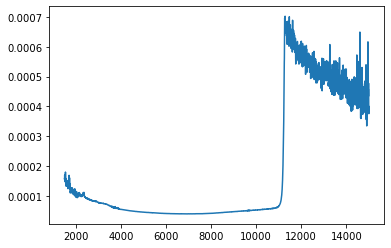

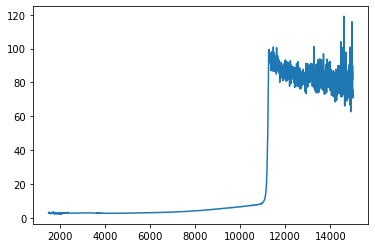

In [10]:
getnandkappa("Aufgabe_4-1_S1-GaAs-undoped-470um_N50_R4_TR.txt","Aufgabe_4-2_S1-GaAs-undoped-470um_N50_R4_RE.txt",470*10**(-6),3.4,0.00005)


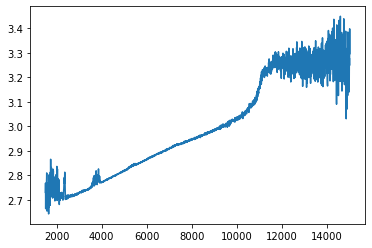

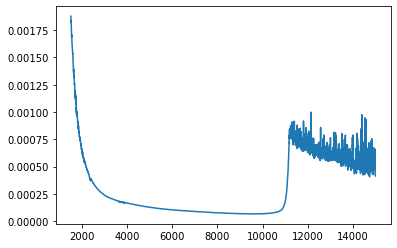

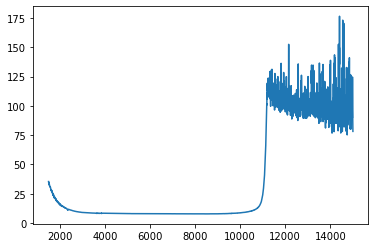

In [135]:
getnandkappa("Aufgabe_4-1_S2-GaAs-n-doped-440um_N50_R4_TR.txt","Aufgabe_4-2_S2-GaAs-n-doped-440um_N50_R4_RE.txt",440*10**(-6),3.4,0.00005)


C:\Users\Eric\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


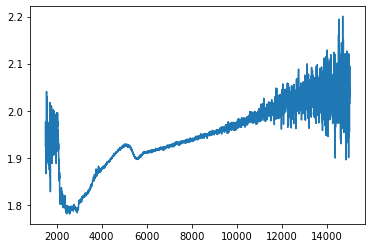

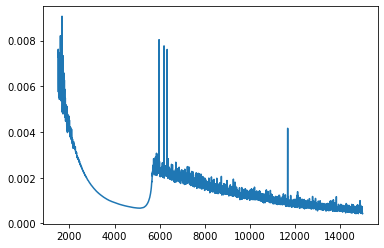

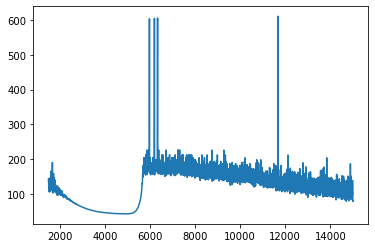

In [136]:
getnandkappa("Aufgabe_4-1_S3-GaSb-_-doped-500um_N50_R4_TR.txt","Aufgabe_4-2_S3-GaSb-_-doped-500um_N50_R4_RE.txt",500*10**(-6),2,0.0005)

C:\Users\Eric\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Eric\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


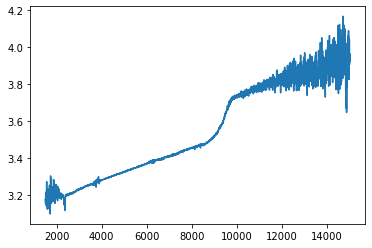

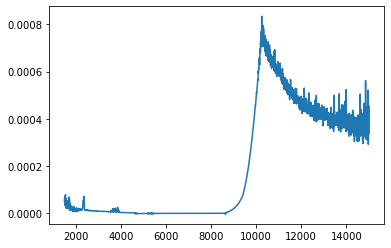

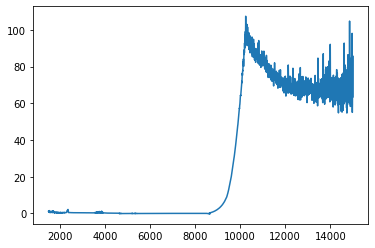

In [137]:
getnandkappa("Aufgabe_4-1_S4-Si-undoped-530um_N50_R4_TR.txt","Aufgabe_4-2_S4-Si-undoped-530um_N50_R4_RE.txt",530*10**(-6),2,0.00005)